In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [8]:
data_dir = "D:/04_jyotiraditya/FullIJCNN2013"
image_dir=os.path.join(data_dir)
gt_file = os.path.join(data_dir, 'gt.txt')

In [9]:
ground_truth = []

with open(gt_file, "r") as file:

    for line in file:

        data= line.strip().split(";")

        filename= data[0]

        leftCol= int(data[1])

        topRow= int(data[2])

        rightCol= int(data[3])

        bottomRow = int(data[4])

        classID= int(data[5])

        ground_truth.append((filename, (leftCol, topRow, rightCol, bottomRow), classID))

In [15]:
features=[]
labels=[]
for filename,dim,cid in ground_truth:
    image_path=os.path.join(image_dir,filename)
    image=cv2.imread(image_path)
    h,w=image.shape[:2]
    y1,y2,x1,x2=max(0,dim[1]),min(h,dim[3]),max(0,dim[0]),min(w,dim[2])
    cr=image[y1:y2,x1:x2]
    features.append(cr)
    labels.append(cid)
#     for gt_filename,_,classID in ground_truth:
#         if gt_filename==filename:
#             labels.append(classID)
#             break

In [16]:
resized_images=[cv2.resize(image,(30,30)) for image in features]
features=np.array([image.flatten() for image in resized_images])

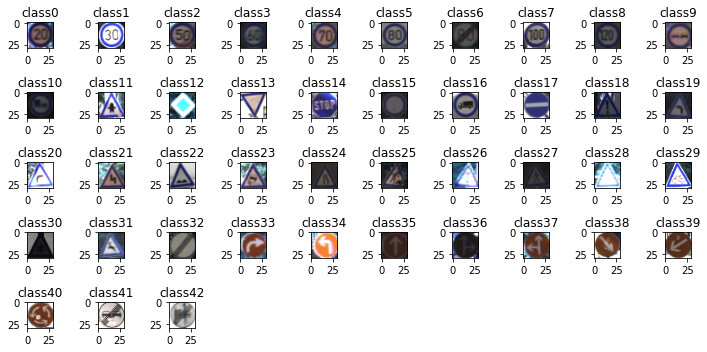

In [19]:
import math
nc=len(np.unique(labels))
ns=10
nr=math.ceil(nc/ns)
fig, axes = plt.subplots(nr, ns, figsize=(10, 1*nr))
for idx,class_label in enumerate(np.unique(labels)):
    si=resized_images[labels.index(class_label)]
    ax=axes[idx//ns,idx%ns]
    ax.imshow(si)
    ax.set_title(f"class{class_label}")
for ax in axes.flatten():
    if not ax.images:
            ax.axis("off")
plt.tight_layout()
plt.show()

In [20]:
def plot_class_distribution(labels):
    label_mapping = {
        0: "speed limit 20",
        1: "speed limit 30",
        2: "speed limit 50",
        3: "speed limit 60",
        4: "speed limit 70",
        5: "speed limit 80",
        6: "restriction ends 80",
        7: "speed limit 100",
        8: "speed limit 120",
        9: "no overtaking",
        10: "no overtaking (trucks)",
        11: "priority at next intersection",
        12: "priority road",
        13: "give way",
        14: "stop",
        15: "no traffic both ways",
        16: "no trucks",
        17: "no entry",
        18: "danger",
        19: "bend left",
        20: "bend right",
        21: "bend",
        22: "uneven road",
        23: "slippery road",
        24: "road narrows",
        25: "construction",
        26: "traffic signal",
        27: "pedestrian crossing",
        28: "school crossing",
        29: "cycles crossing",
        30: "snow",
        31: "animals",
        32: "restriction ends",
        33: "go right",
        34: "go left",
        35: "go straight",
        36: "go right or straight",
        37: "go left or straight",
        38: "keep right",
        39: "keep left",
        40: "roundabout",
        41: "restriction ends (overtaking)",
        42: "restriction ends (overtaking (trucks))"
    }
    
    label_names = [label_mapping[label] for label in labels]
    plt.figure(figsize=(16,12))
    
    class_counts = pd.Series(label_names).value_counts()
    plt.bar(class_counts.index, class_counts.values)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Distribution of Classes')
    plt.xticks(rotation=90) 
    plt.show()

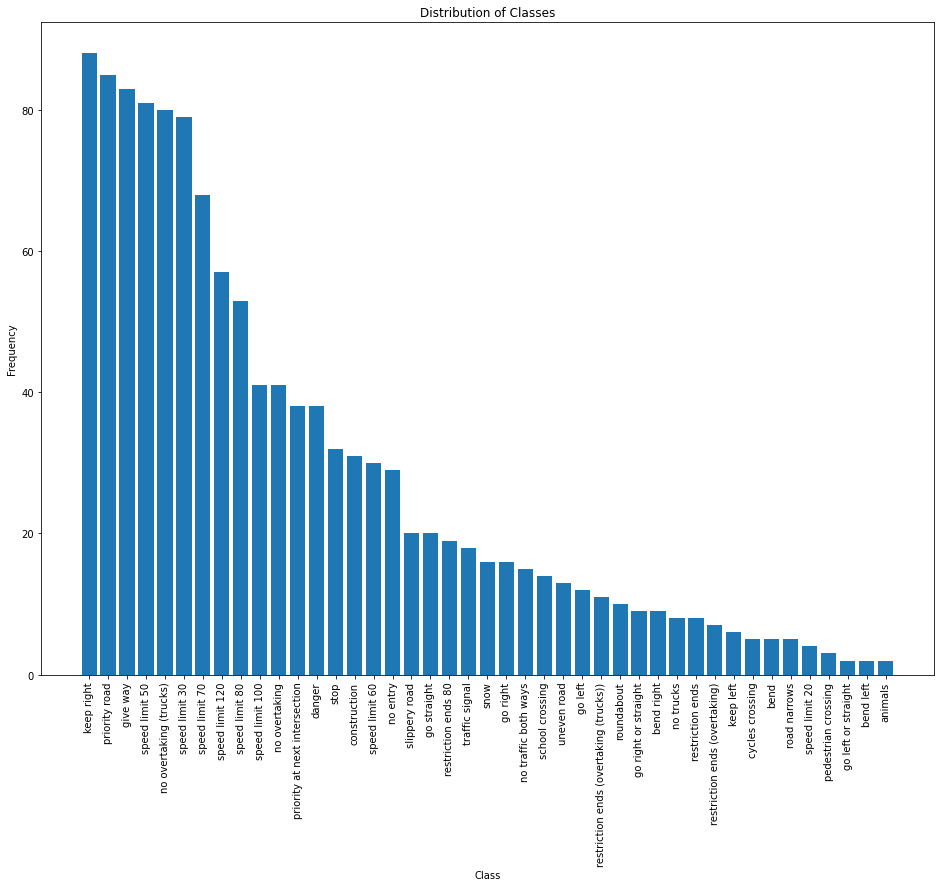

In [21]:
plot_class_distribution(labels)

In [22]:
features=features/255.0

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report

In [25]:
mlp=MLPClassifier(max_iter=100)

In [26]:
mlp.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [27]:
y_pred=mlp.predict(x_test)

In [28]:
print("Accuracy Score=",accuracy_score(y_test,y_pred))

Accuracy Score= 0.8353909465020576


In [29]:
print("Classification report:")

Classification report:


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.87      0.91      0.89        22
           2       0.94      1.00      0.97        16
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        14
           5       0.64      1.00      0.78         7
           6       0.80      1.00      0.89         4
           7       0.89      0.73      0.80        11
           8       0.72      0.93      0.81        14
           9       0.78      1.00      0.88         7
          10       1.00      1.00      1.00        13
          11       0.83      1.00      0.91         5
          12       0.94      0.89      0.91        18
          13       1.00      1.00      1.00        15
          14       1.00      0.83      0.91         6
          15       0.83      0.56      0.67         9
          16       1.00      0.33      0.50         3
          17       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameter_space = {'hidden_layer_sizes': [(100, 50), (50,100),  (100,100), (200,100), (200,200)], 
                   'activation': ['tanh', 'relu', 'logistic'], 
                    'solver': ['sgd', 'adam', 'lbfgs'], 
                    'alpha': [0.0001, 0.9], 'learning_rate': ['constant', 'adaptive'],}

In [33]:
gs=GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=3)

In [ ]:
gs.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
